## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
import itertools
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95
MONITORS = ['val_loss', 'val_acc']
PATIENCE = [5, 10, 25]

In [7]:
# 載入 Callbacks
results = {}
for mon, pat in itertools.product(MONITORS, PATIENCE):
    earlystop = EarlyStopping(monitor=mon, patience=pat, verbose=1)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_test, y_test), shuffle=True, callbacks=[earlystop])

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = "exp-Moniter-%s-patience-%d" % (mon, pat)
    results[exp_name_tag] = {'train-loss': train_loss, 'valid-loss': valid_loss, 'train-acc': train_acc, 'valid-acc': valid_acc}





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
______

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 172us/step - loss: 2.1850 - acc: 0.2740 - val_loss: 2.1068 - val_acc: 0.3107
Epoch 2/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.7399 - acc: 0.3921 - val_loss: 1.8336 - val_acc: 0.3710
Epoch 3/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.6158 - acc: 0.4330 - val_loss: 1.6883 - val_acc: 0.4053
Epoch 4/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5434 - acc: 0.4607 - val_loss: 1.6239 - val_acc: 0.4333
Epoch 5/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.4881 - acc: 0.4813 - val_loss: 1.5953 - val_acc: 0.4456
Epoch 6/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.4431 - acc: 0.4962 - val_loss: 1.5600 - val_acc: 0.4534
Epoch 7/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.4031 - acc: 0.5138 - val_loss: 1.5663 - 

50000/50000 [==============================] - 6s 120us/step - loss: 1.1583 - acc: 0.5996 - val_loss: 1.4590 - val_acc: 0.4931
Epoch 17/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.1362 - acc: 0.6100 - val_loss: 1.4540 - val_acc: 0.4888
Epoch 18/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.1122 - acc: 0.6172 - val_loss: 1.4533 - val_acc: 0.4948
Epoch 19/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.0912 - acc: 0.6258 - val_loss: 1.4652 - val_acc: 0.4927
Epoch 20/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.0691 - acc: 0.6324 - val_loss: 1.4634 - val_acc: 0.4882
Epoch 21/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.0472 - acc: 0.6417 - val_loss: 1.4485 - val_acc: 0.4951
Epoch 22/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.0251 - acc: 0.6509 - val_loss: 1.4566 - val_acc: 0.4929
Epoch 23/50
50000/50000 [==============

50000/50000 [==============================] - 6s 125us/step - loss: 1.1030 - acc: 0.6200 - val_loss: 1.4568 - val_acc: 0.4855
Epoch 19/50
50000/50000 [==============================] - 7s 130us/step - loss: 1.0819 - acc: 0.6316 - val_loss: 1.4528 - val_acc: 0.4942
Epoch 20/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.0592 - acc: 0.6388 - val_loss: 1.4679 - val_acc: 0.4870
Epoch 21/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.0375 - acc: 0.6458 - val_loss: 1.4661 - val_acc: 0.4875
Epoch 22/50
50000/50000 [==============================] - 6s 127us/step - loss: 1.0156 - acc: 0.6551 - val_loss: 1.4623 - val_acc: 0.4894
Epoch 23/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.9929 - acc: 0.6632 - val_loss: 1.4793 - val_acc: 0.4862
Epoch 24/50
50000/50000 [==============================] - 6s 126us/step - loss: 0.9745 - acc: 0.6715 - val_loss: 1.4557 - val_acc: 0.4950
Epoch 25/50
50000/50000 [==============

50000/50000 [==============================] - 6s 121us/step - loss: 0.9431 - acc: 0.6852 - val_loss: 1.4777 - val_acc: 0.4941
Epoch 27/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.9221 - acc: 0.6932 - val_loss: 1.4754 - val_acc: 0.4942
Epoch 28/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.9032 - acc: 0.7013 - val_loss: 1.4819 - val_acc: 0.4941
Epoch 29/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.8847 - acc: 0.7074 - val_loss: 1.4832 - val_acc: 0.4969
Epoch 30/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.8629 - acc: 0.7163 - val_loss: 1.4959 - val_acc: 0.4924
Epoch 31/50
50000/50000 [==============================] - 6s 120us/step - loss: 0.8435 - acc: 0.7252 - val_loss: 1.5099 - val_acc: 0.4871
Epoch 32/50
50000/50000 [==============================] - 6s 122us/step - loss: 0.8268 - acc: 0.7311 - val_loss: 1.5098 - val_acc: 0.4943
Epoch 33/50
50000/50000 [==============

50000/50000 [==============================] - 6s 117us/step - loss: 0.7593 - acc: 0.7559 - val_loss: 1.5090 - val_acc: 0.4961
Epoch 36/50
50000/50000 [==============================] - 6s 119us/step - loss: 0.7410 - acc: 0.7640 - val_loss: 1.5212 - val_acc: 0.4947
Epoch 37/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.7233 - acc: 0.7709 - val_loss: 1.5628 - val_acc: 0.4959
Epoch 38/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.7045 - acc: 0.7786 - val_loss: 1.5377 - val_acc: 0.4964
Epoch 39/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.6855 - acc: 0.7860 - val_loss: 1.5606 - val_acc: 0.4856
Epoch 40/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.6686 - acc: 0.7923 - val_loss: 1.5672 - val_acc: 0.4974
Epoch 41/50
50000/50000 [==============================] - 6s 117us/step - loss: 0.6528 - acc: 0.7985 - val_loss: 1.5829 - val_acc: 0.4920
Epoch 42/50
50000/50000 [==============

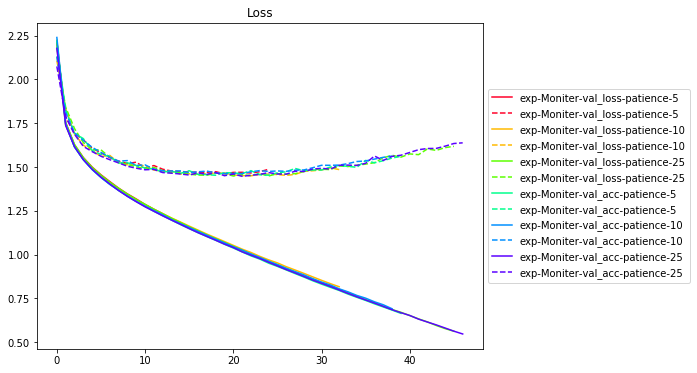

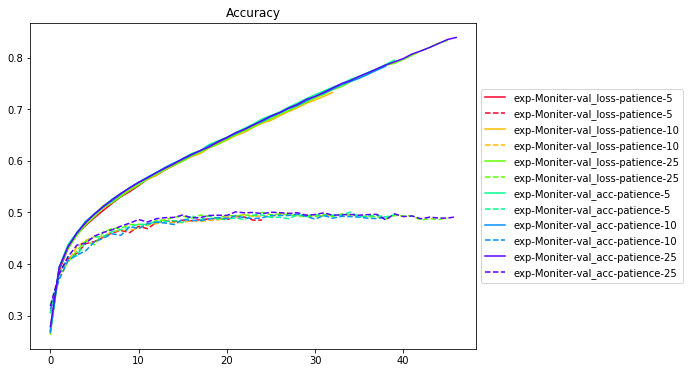

In [8]:
%matplotlib inline
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()